In [1]:
import GPy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X = np.load('../tampines-npX.npy')
Y = np.load('../tampines-npY.npy')
Y = Y.reshape((Y.shape[0], 1))
x = X[:1000,:-1]
y = Y[:1000]
print(x.shape)

(1000, 2)


O(N^3) computational complexity
Get as much insight out of a limited dataset
Sparse Gaussian Processes
Use small number of points to make predictions, but those points get influenced by entire dataset

In [4]:
print(x.shape)

(1000, 2)


 /Users/Wenqi/cs4246-project/venv/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


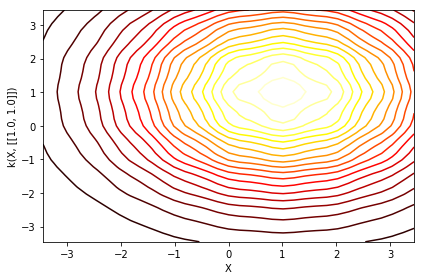

In [12]:
num_inducing = 100
k1 = GPy.kern.RBF(input_dim=2, variance=1., lengthscale=2.)
k2 = GPy.kern.StdPeriodic(input_dim=2, variance=1., lengthscale=4.)
kernel = k1 * k2
kernel.plot()
plt.show()

Optimization restart 1/3, f = 1104.229879645969
Optimization restart 2/3, f = 2580.769247730678
Optimization restart 3/3, f = 2580.7692463616477


 /Users/Wenqi/cs4246-project/venv/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


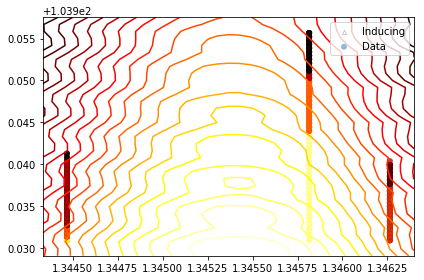

In [13]:
m = GPy.models.SparseGPRegression(x, y, kernel=kernel, num_inducing=num_inducing)
m.optimize_restarts(num_restarts=3)
m.plot()
plt.show()